## Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
trainingSet = pd.read_csv("./data/train.csv")

In [3]:
testingSet = pd.read_csv("./data/test.csv")

In [4]:
import nltk
%pip install sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')




Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aryaan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sample = trainingSet.sample(1000)

sampled_texts = sample['Text']
sampled_summaries = sample['Summary']

# sample['Stemmed Text'] = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
#                     for sent in sent_tokenize(message)
#                     for word in word_tokenize(sent))
#                    for message in sampled_texts]

# sample['Stemmed Summary'] = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
#                     for sent in sent_tokenize(message)
#                     for word in word_tokenize(sent))
#                                for message in sampled_summaries]

analyzer = SentimentIntensityAnalyzer()

def calculate_sentimentality(s):
    sent_list = []
    for word in s.split(' '):
        sentiment = analyzer.polarity_scores(word)
        compound_score = sentiment['compound']
        sent_list.append(compound_score)
        
    return sum(sent_list)


sample['Text Sentimentality'] = sample['Text'].apply(calculate_sentimentality)
    
sample['Summary Sentimentality'] = sample['Summary'].apply(calculate_sentimentality)

sample.head()






,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Text Sentimentality,Summary Sentimentality
53445,1560316,B008JFUOWM,A125HMWRLP5Y0,0,0,1395100800,A REAL TRIBUTE MOVIE.,SO SAD TO SEE PAUL WALKER IN HIS PRIME STILL. ...,5.0,0.7797,0.0000
21264,1678728,B00GM1X2JM,A1JM4DUSP5HEW6,0,0,1405900800,Five Stars,Loved it!! Absolutely love it!!,5.0,1.2363,0.0000
63469,911686,B0009S4IEW,AZDKBJNZWEGWD,0,0,1387929600,wry comedy,What is success? Rumpole has no social aspira...,5.0,0.9919,0.3612
35561,1315483,B0030HJER0,A2MF7FKVSII2ED,0,1,1291852800,Can't wait for Season 3!,My favorite flatmates have improved upon the f...,5.0,1.0127,0.0000
64062,571202,B000056VP3,A2R3JI8YFCAK90,0,0,1388707200,This is a true story.,This story is about another coach. The story t...,5.0,0.9861,0.4215


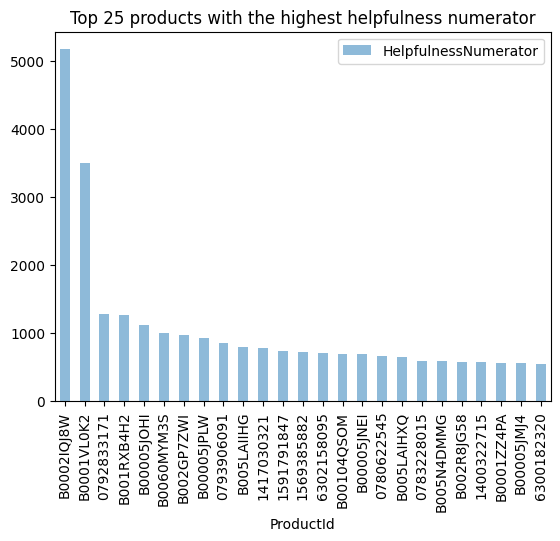

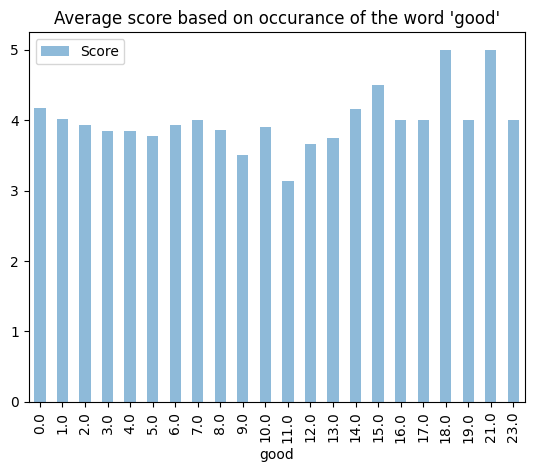

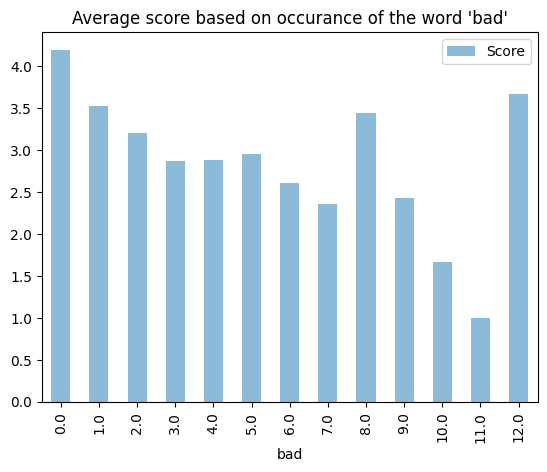

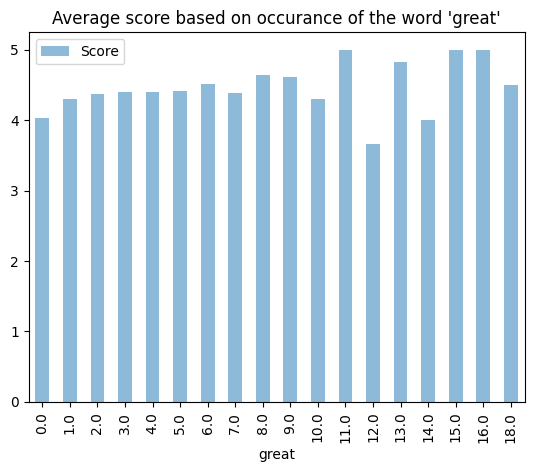

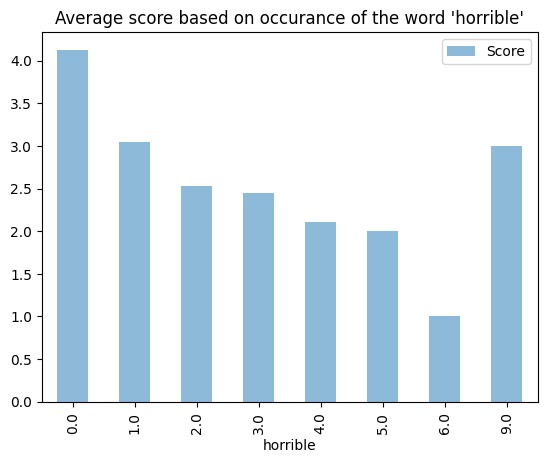

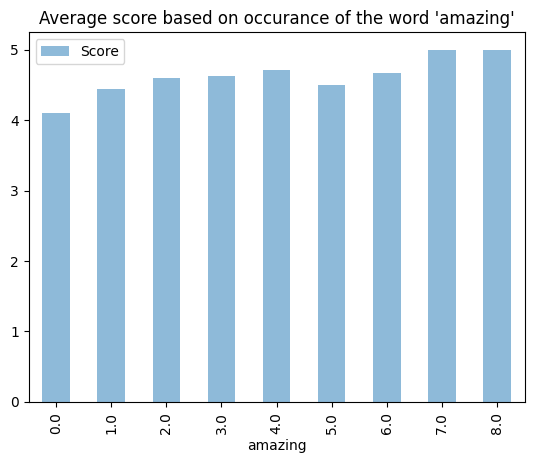

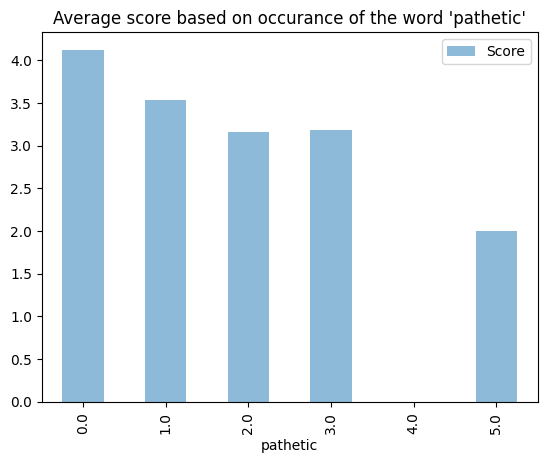

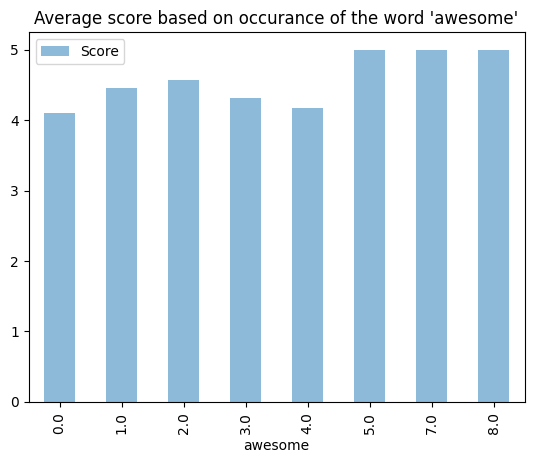

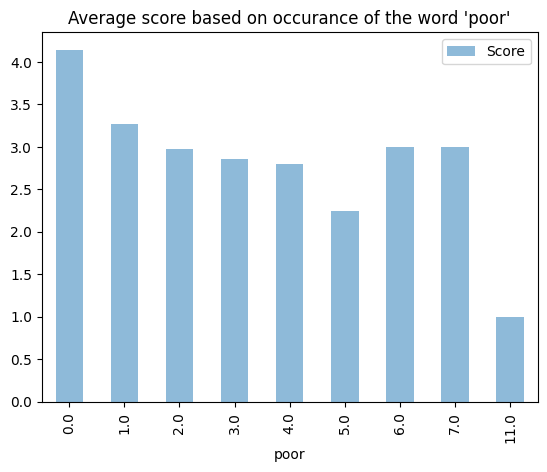

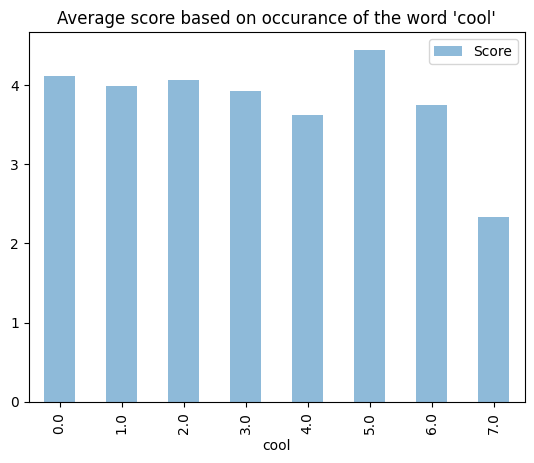

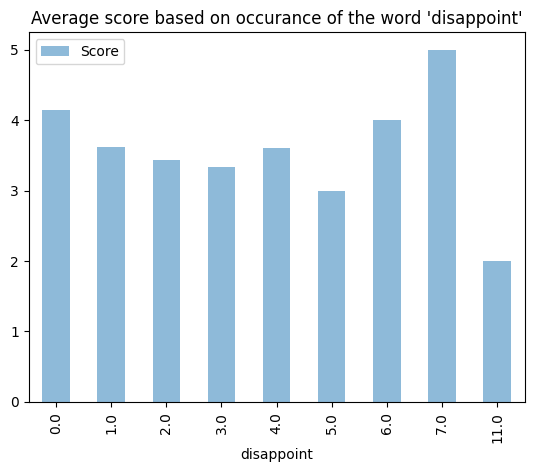

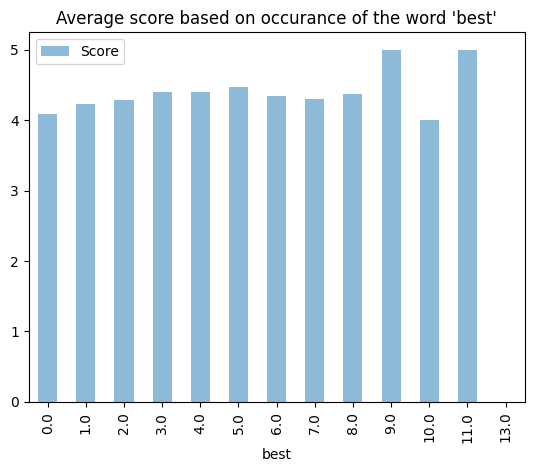

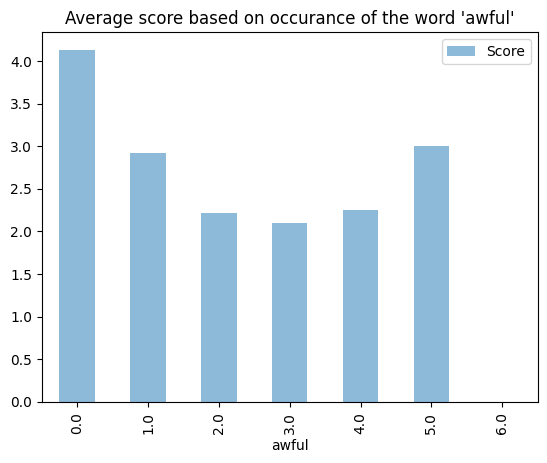

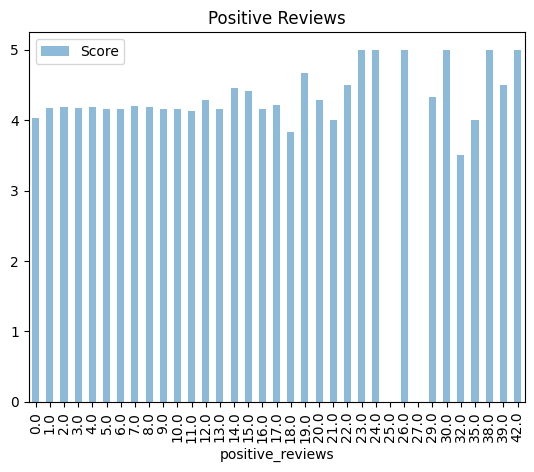

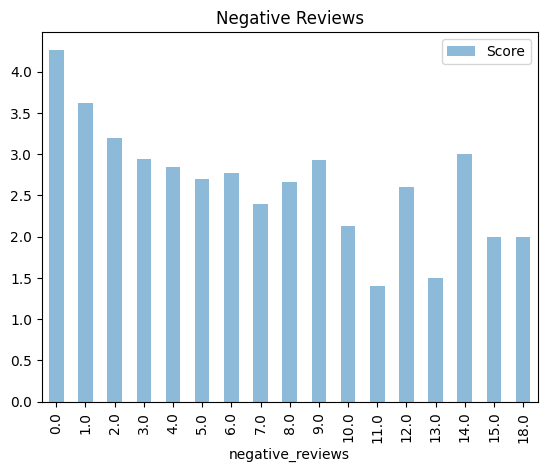

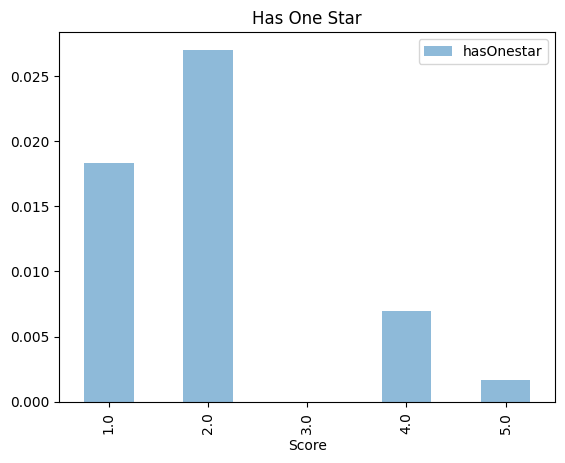

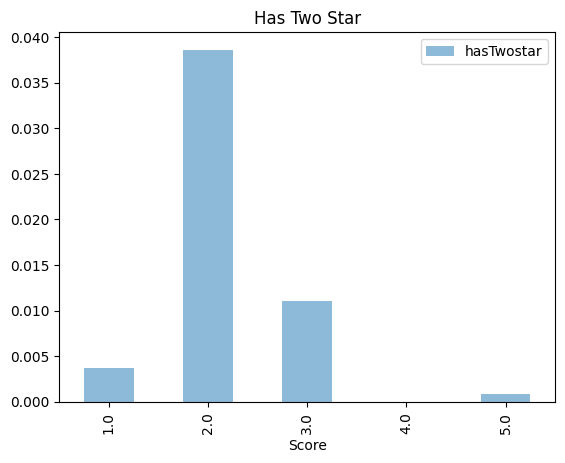

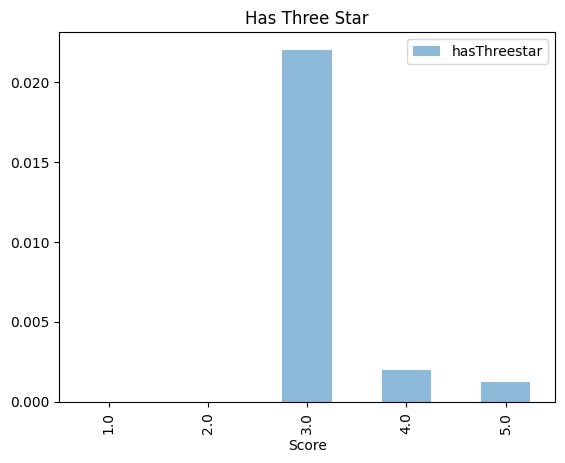

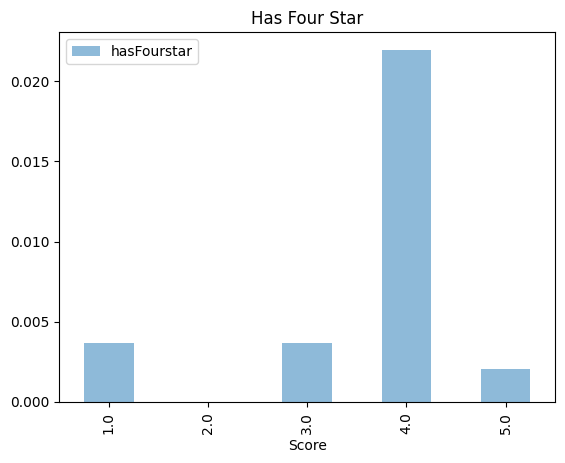

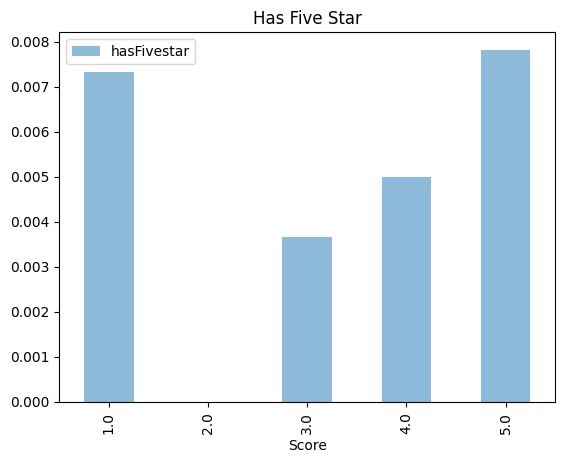

In [6]:
# print("train.csv shape is ", trainingSet.shape)
# print("test.csv shape is ", testingSet.shape)

# print()

# print(trainingSet.head())
# print()
# print(testingSet.head())

# print()

# print(trainingSet.describe())

# trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
# plt.title("Count of Scores")
# plt.show()

# trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 most rated Products")
# plt.show()

# trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 least rated Products")
# plt.show()

# trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 Reviewers")
# plt.show()

# trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
# plt.title("Lowest 25 Reviewers")
# plt.show()

# trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
# plt.title("Mean Helpfulness Numerator per Score")
# plt.show()

# trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 best rated Products")
# plt.show()

# trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 worst rated Products")
# plt.show()

# trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 kindest Reviewers")
# plt.show()



# trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
# plt.title("Top 25 harshest Reviewers")
# plt.show()

# trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
# plt.title("Mean of top 25 most rated Products")
# plt.show()


### movies with highest 
y = trainingSet.groupby("ProductId")["HelpfulnessNumerator"].sum()
y.nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 products with the highest helpfulness numerator")
plt.show()


## count the occurance of the words good, bad, great, horrible, amazing, pathetic, awesome, poor, cool, disappoint, best, awful
trainingSet['good'] = trainingSet['Text'].str.count('good')
average_good = trainingSet[['good', 'Score']].groupby('good').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'good'")
plt.show()

trainingSet['bad'] = trainingSet['Text'].str.count('bad')
trainingSet[['bad', 'Score']].groupby('bad').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'bad'")
plt.show()

trainingSet['great'] = trainingSet['Text'].str.count('great')
trainingSet[['great', 'Score']].groupby('great').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'great'")
plt.show()

trainingSet['horrible'] = trainingSet['Text'].str.count('horrible')
trainingSet[['horrible', 'Score']].groupby('horrible').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'horrible'")
plt.show()

trainingSet['amazing'] = trainingSet['Text'].str.count('amazing')
trainingSet[['amazing', 'Score']].groupby('amazing').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'amazing'")
plt.show()

trainingSet['pathetic'] = trainingSet['Text'].str.count('pathetic')
trainingSet[['pathetic', 'Score']].groupby('pathetic').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'pathetic'")
plt.show()

trainingSet['awesome'] = trainingSet['Text'].str.count('awesome')
trainingSet[['awesome', 'Score']].groupby('awesome').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'awesome'")
plt.show()

trainingSet['poor'] = trainingSet['Text'].str.count('poor')
trainingSet[['poor', 'Score']].groupby('poor').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'poor'")
plt.show()

trainingSet['cool'] = trainingSet['Text'].str.count('cool')
trainingSet[['cool', 'Score']].groupby('cool').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'cool'")
plt.show()

trainingSet['disappoint'] = trainingSet['Text'].str.count('disappoint')
trainingSet[['disappoint', 'Score']].groupby('disappoint').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'disappoint'")
plt.show()


trainingSet['best'] = trainingSet['Text'].str.count('best')
trainingSet[['best', 'Score']].groupby('best').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'best'")
plt.show()

trainingSet['awful'] = trainingSet['Text'].str.count('awful')
trainingSet[['awful', 'Score']].groupby('awful').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Average score based on occurance of the word 'awful'")
plt.show()

### Cumulative of reviews 
trainingSet["positive_reviews"] = trainingSet['Text'].str.count('best') + trainingSet['Text'].str.count('cool') + trainingSet['Text'].str.count('awesome') + trainingSet['Text'].str.count('amazing') + trainingSet['Text'].str.count('great') + trainingSet['Text'].str.count('good')
trainingSet["negative_reviews"] = trainingSet['Text'].str.count('bad') + trainingSet['Text'].str.count('horrible') + trainingSet['Text'].str.count('pathetic') + trainingSet['Text'].str.count('poor') + trainingSet['Text'].str.count('disappoint') + trainingSet['Text'].str.count('awful')

### Plot cumulative reviews 
trainingSet[['positive_reviews', 'Score']].groupby('positive_reviews').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Positive Reviews")
plt.show()

trainingSet[['negative_reviews', 'Score']].groupby('negative_reviews').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Negative Reviews")
plt.show()

sample = trainingSet.sample(5000)

sampled_texts = sample['Text']
sampled_summaries = sample['Summary']

# sample['Stemmed Text'] = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
#                     for sent in sent_tokenize(message)
#                     for word in word_tokenize(sent))
#                    for message in sampled_texts]

# sample['Stemmed Summary'] = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
#                     for sent in sent_tokenize(message)
#                     for word in word_tokenize(sent))
#                                for message in sampled_summaries]

analyzer = SentimentIntensityAnalyzer()

def calculate_sentimentality(s):
    sent_list = []
    for word in s.split(' '):
        sentiment = analyzer.polarity_scores(word)
        compound_score = sentiment['compound']
        sent_list.append(compound_score)
        
    return sum(sent_list)


sample['Text Sentimentality'] = sample['Text'].apply(calculate_sentimentality)
    
sample['Summary Sentimentality'] = sample['Summary'].apply(calculate_sentimentality)

sample.head()

def hasOnestar(s):
    counter = s.lower().count("one star" or "1 star")
    if counter == 0:
        return 0 
    else:
        return 1 
    
sample["hasOnestar"] = sample["Text"].apply(hasOnestar)

sample[["hasOnestar", "Score"]].groupby("Score").mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title("Has One Star")
plt.show()

def hasTwostar(s):
    counter = s.lower().count("two star" or "2 star")
    if counter == 0:
        return 0 
    else:
        return 1 
    
sample["hasTwostar"] = sample["Text"].apply(hasTwostar)
sample[["hasTwostar", "Score"]].groupby("Score").mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title("Has Two Star")
plt.show()

def hasThreestar(s):
    counter = s.lower().count("three star" or "3 star")
    if counter == 0:
        return 0 
    else:
        return 1 
    
sample["hasThreestar"] = sample["Text"].apply(hasThreestar)
sample[["hasThreestar", "Score"]].groupby("Score").mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title("Has Three Star")
plt.show()

def hasFourstar(s):
    counter = s.lower().count("four star" or "4 star")
    if counter == 0:
        return 0 
    else:
        return 1 
    
sample["hasFourstar"] = sample["Text"].apply(hasFourstar)

sample[["hasFourstar", "Score"]].groupby("Score").mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title("Has Four Star")
plt.show()

def hasFivestar(s):
    counter = s.lower().count("five star" or "5 star")
    if counter == 0:
        return 0 
    else:
        return 1 
    
sample["hasFivestar"] = sample["Text"].apply(hasFivestar)

sample[["hasFivestar", "Score"]].groupby("Score").mean().plot(kind = "bar", legend = True, alpha = 0.5)
plt.title("Has Five Star")
plt.show()


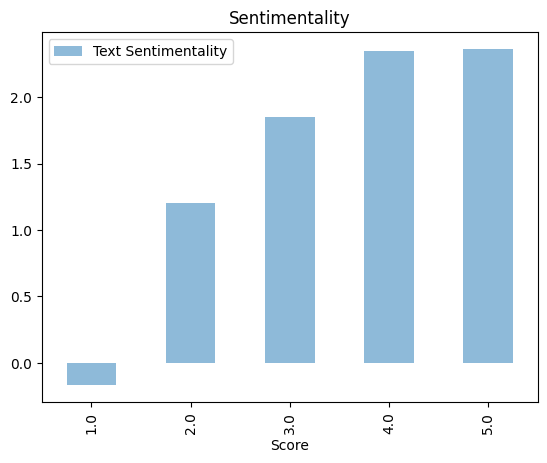

In [7]:
sample[['Score', 'Text Sentimentality']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Sentimentality")
plt.show()

## Feature Extraction



In [8]:
import pandas as pd
import nltk
%pip install sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def process(df):
    # This is where you can do all your processing
    
    #df = df.sample(1000)
    
    df["Text"] = df["Text"].fillna('')
    df["Summary"] = df["Summary"].fillna('')

    ### Creating new column to find the index 
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    
    ### Filling the NA values as 0 
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    
    #### Length of the text review basically 
    
    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
    df['ReviewLength'] = df['ReviewLength'].fillna(0)
    analyzer = SentimentIntensityAnalyzer()

    def calculate_sentimentality(s):
        sent_list = []
        for word in s.split(' '):
            sentiment = analyzer.polarity_scores(word)
            compound_score = sentiment['compound']
            sent_list.append(compound_score)
        
        return sum(sent_list)
    # df['good'] = df['Text'].str.count('best')
    # df['good'] = df['Text'].str.count('cool')
    # df['good'] = df['Text'].str.count('awesome')
    # df['good'] = df['Text'].str.count('amazing')
    # df['good'] = df['Text'].str.count('great')
    # df['good'] = df['Text'].str.count('good')
    # df['good'] = df['Text'].str.count('awful')
    # df['good'] = df['Text'].str.count('disappoint')
    # df['good'] = df['Text'].str.count('poor')
    # df['good'] = df['Text'].str.count('pathetic')
    # df['good'] = df['Text'].str.count('horrible')
    # df['good'] = df['Text'].str.count('bad')
    
    # df["positive_reviews"] = df['Text'].str.count('best') + df['Text'].str.count('cool') + df['Text'].str.count('awesome') + df['Text'].str.count('amazing') + df['Text'].str.count('great') + df['Text'].str.count('good')
    # df["negative_reviews"] = df['Text'].str.count('bad') + df['Text'].str.count('horrible') + df['Text'].str.count('pathetic') + df['Text'].str.count('poor') + df['Text'].str.count('disappoint') + df['Text'].str.count('awful')
    
    # df = df.drop(columns = ['good', 'cool', 'awesome', 'amazing', 'great', 'best', "awful", "disappoint", "poor", "pathetic", "horrible", "bad"])
    
    df = df[df['Text'].notnull()]
    df = df[df['Summary'].notnull()]
    
    df['Text Sentimentality'] = df['Text'].apply(calculate_sentimentality)
    df['Summary Sentimentality'] = df['Summary'].apply(calculate_sentimentality)
    
    df['Text Sentimentality'] = df['Text Sentimentality'].fillna(0)
    df['Summary Sentimentality'] = df['Summary Sentimentality'].fillna(0)
    
    
    def hasOnestar(s):
        count = s.lower().count('one star') + s.lower().count('1 star')
        if count != 0:
            return 1
        return 0

    df['hasOnestar'] = df['Text'].apply(hasOnestar)

    def hasTwostar(s):
        count = s.lower().count('two stars') + s.lower().count('2 stars')
        if count != 0:
            return 1
        return 0

    df['hasTwostar'] = df['Text'].apply(hasTwostar)

    def hasThreestar(s):
        count = s.lower().count('three stars') + s.lower().count('3 stars')
        if count != 0:
            return 1
        return 0

    df['hasThreestar'] = df['Text'].apply(hasThreestar)

    def hasFourstar(s):
        count = s.lower().count('four stars') + s.lower().count('4 stars')
        if count != 0:
            return 1
        return 0

    df['hasFourstar'] = df['Text'].apply(hasFourstar)
    
    df['hasThreestar'] = df['Text'].apply(hasThreestar)

    def hasFivestar(s):
        count = s.lower().count('five stars') + s.lower().count('5 stars')
        if count != 0:
            return 1
        return 0

    df['hasFivestar'] = df['Text'].apply(hasFivestar)
    
    # def findUserMean(id):
    #     df2 = df.loc[df['UserId'] == id]
    #     mean = df2['Score'].mean()
    #     return mean
    # df['UserMean'] = df['UserId'].apply(findUserMean)
    # def findProductMean(id):
    #     df2 = df.loc[df['ProductId'] == id]
    #     mean = df2['Score'].mean()
    #     return mean

    # df['ProductMean'] = df['ProductId'].apply(findProductMean)
    
    null_cols = df.columns[df.isnull().any()]
    
    print(null_cols)
    
    df["Score"] =   df["Score"].fillna(0)
    # df["UserMean"] = df["UserMean"].fillna(0)
    # df["ProductMean"] = df["ProductMean"].fillna(0)
    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

##sample trainingSet

trainingSet = trainingSet.sample(10000)

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aryaan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Index(['Score'], dtype='object')


## Creating your model

Accuracy on testing set =  0.368
RMSE on testing set =  3.736


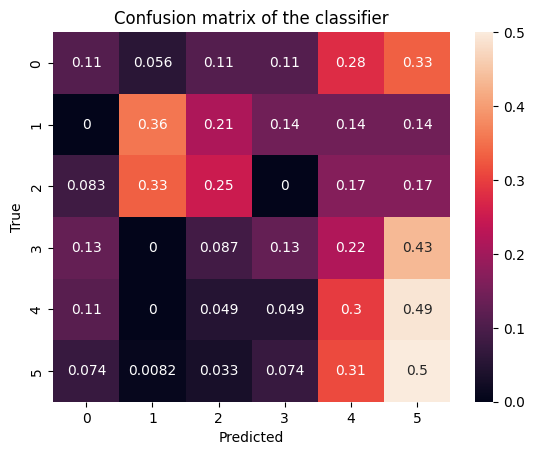

In [15]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import tree 

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv").sample(1000)

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=1/4.0,
        random_state=0
    )



# This is where you can do more feature selection
X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary'])

# Learn the model
model = tree.DecisionTreeClassifier().fit(X_train_processed, Y_train)

# pickle model - saves it so you can load it later
with open('knn_20_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)

# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test_processed)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



## Create the Kaggle submission

In [11]:
X_submission = pd.read_csv("./data/X_test.csv")
X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

X_submission['Score'] = model.predict(X_submission_processed)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)


df3 = pd.read_csv("./data/submission.csv")
print(len(df3))

961


Now you can upload the `submission.csv` to kaggle

In [11]:
print(Y_train)

1546    5.0
7763    4.0
4855    3.0
3305    0.0
3863    3.0
       ... 
1335    0.0
5079    5.0
7452    1.0
2010    4.0
8849    3.0
Name: Score, Length: 750, dtype: float64
